In [1]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Automatically created module for IPython interactive environment


In [2]:
X_train, X_test = X_train[:5000], X_test[:500]
y_train, y_test = y_train[:5000], y_test[:500]
y_train, y_test = y_train.astype(int), y_test.astype(int)
y_train

array([5, 0, 4, ..., 2, 1, 2])

In [38]:
X_train.max()

1.0

In [23]:
from sklearn.linear_model import LogisticRegressionCV

In [24]:
lr = LogisticRegressionCV(penalty="l2")
lr.fit(X_train, y_train)

LogisticRegressionCV()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       1.00      1.00      1.00        67
           2       0.96      0.89      0.92        55
           3       0.89      0.89      0.89        45
           4       0.90      0.96      0.93        55
           5       0.89      0.84      0.87        50
           6       0.93      0.88      0.90        43
           7       0.82      0.92      0.87        49
           8       0.88      0.88      0.88        40
           9       0.94      0.87      0.90        54

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.92      0.91      0.91       500



In [26]:
import numpy as np

In [27]:
X_train.shape, X_test.shape

((5000, 784), (500, 784))

In [28]:
sim = X_test @ X_train.T

In [29]:
alpha = lr.C_[0] * (np.eye(10)[y_train] - lr.predict_proba(X_train))

In [31]:
recon = (alpha[None, :, :] * sim[:, :, None]).sum(1)

In [32]:
from scipy.special import softmax
recon = softmax(recon, axis=-1)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, recon.argmax(-1)))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        42
           1       1.00      0.81      0.89        67
           2       0.93      0.76      0.84        55
           3       0.76      0.91      0.83        45
           4       0.97      0.71      0.82        55
           5       1.00      0.22      0.36        50
           6       0.94      0.77      0.85        43
           7       0.97      0.63      0.77        49
           8       0.32      1.00      0.48        40
           9       0.79      0.81      0.80        54

    accuracy                           0.75       500
   macro avg       0.85      0.76      0.76       500
weighted avg       0.87      0.75      0.76       500



In [35]:
np.corrcoef(recon, lr.predict_proba(X_test))

array([[ 1.        , -0.22961977, -0.15454891, ..., -0.14250648,
        -0.18197892, -0.14945545],
       [-0.22961977,  1.        , -0.1267084 , ..., -0.22692648,
        -0.13271204,  0.20615931],
       [-0.15454891, -0.1267084 ,  1.        , ..., -0.12662585,
        -0.19573839, -0.13637987],
       ...,
       [-0.14250648, -0.22692648, -0.12662585, ...,  1.        ,
        -0.18306447, -0.189984  ],
       [-0.18197892, -0.13271204, -0.19573839, ..., -0.18306447,
         1.        , -0.14168128],
       [-0.14945545,  0.20615931, -0.13637987, ..., -0.189984  ,
        -0.14168128,  1.        ]])

(array([  8.,  21.,  15.,  10.,  19.,  21.,  17.,  26.,  35., 328.]),
 array([0.04528069, 0.14075262, 0.23622455, 0.33169648, 0.42716841,
        0.52264034, 0.61811227, 0.7135842 , 0.80905613, 0.90452806,
        0.99999999]),
 <BarContainer object of 10 artists>)

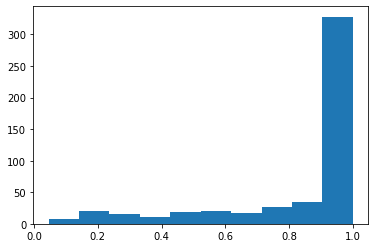

In [36]:
acprob = lr.predict_proba(X_test)
corr = [np.corrcoef(recon[i], acprob[i])[0, 1] for i in range(500)]

import matplotlib.pyplot as plt
plt.hist(corr)

In [ ]:
inf_vals = np.multiply(sim.toarray(), alpha[None, :])

In [ ]:
inf_vals.shape

In [ ]:
import random

for i in range(5) :
    i = random.randint(0, 800)
    v = dev_data[i]
    print(v['document'])
    print("---")
    vals = inf_vals[i, :]
    top = np.argsort(vals)[-5:]
    for j in top[::-1] :
        print(vals[j], train_data[j]['document'])
    print("==="*10)